# Exercise 2: Metrics & Transformations

In this exercise, you will dive into the essential pre-processing steps of any data mining project. We'll explore how to measure the "distance" between data points and how to transform our data to make it more suitable for analysis and modeling. These steps are crucial because many algorithms are sensitive to the scale and distribution of the data.

**Objective:** To understand and apply data normalization, scaling, and binary encoding, and to measure similarity between data points using different metrics.

**Your Mission:** Work through the following three tasks.

---
## Setup: Importing Libraries

First, let's import the Python libraries we'll need for this exercise. Run the code cell below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist, squareform

# Set plotting style
sns.set_theme(style="whitegrid")

---
## Task 1: The Impact of Normalization on Distance 📏

Distance metrics, like the Euclidean distance, are the foundation of clustering and classification algorithms. However, the scale of your data can dramatically affect these distances. In this task, you'll see how normalizing data to a uniform length changes the game.

### Load Your Data
For this notebook, we'll use the famous Iris dataset as an example.

**Your task:** When working with your own project, replace the Iris dataset with your own data in the cell below.

_Hint: Check the file reading part in Exercises 0 and 1._

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# For your own data, you might load a CSV like this:
# df = pd.read_csv('your_data_file.csv')

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Task 1.a) Calculate Euclidean distance between all the line pairs.

* **Step 1:** Randomly select **5 data lines (rows)** from your dataset.
* **Step 2:** Run the code to calculate the Euclidean distances between all pairs of these 5 lines.
* **Step 3:** The code will display the results as a 5x5 distance matrix. Analyze it. Remember, the distance from any line to itself is 0!

In [3]:
# Step 1: Randomly select 5 data lines
sample_df = df.sample(n=5, random_state=42) # Using random_state for reproducibility
print("Randomly Selected Data Lines:")
display(sample_df)

# Step 2 & 3: Calculate and display the Euclidean distance matrix
distances = pdist(sample_df.values, metric='euclidean')
distance_matrix = pd.DataFrame(squareform(distances), index=sample_df.index, columns=sample_df.index)

print("\nEuclidean Distance Matrix (Original Data):")
display(distance_matrix)

Randomly Selected Data Lines:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4



Euclidean Distance Matrix (Original Data):


,73,18,118,78,76
73,0.000000,3.312099,2.941088,0.387298,0.734847
18,3.312099,0.000000,6.039868,3.190611,3.609709
118,2.941088,6.039868,0.000000,3.062679,2.463737
78,0.387298,3.190611,3.062679,0.000000,0.866025
76,0.734847,3.609709,2.463737,0.866025,0.000000


### Task 1.b) Normalize and Recalculate.

* **Step 1:** The code below normalizes the 5 selected data lines so their length (L2 norm) is 1.
* **Step 2:** It then creates a new 5x5 distance matrix using the *normalized* data.
* **Step 3:** Compare the two matrices (original vs. normalized). Think about the following questions:
    * Did the largest distances change? How?
    * Which pair of lines is "closest" before and after normalization? Is it the same pair?
    * When would this normalization step be critical for a data-mining algorithm (e.g., k-Nearest Neighbors, K-Means Clustering)?

In [4]:
# Step 1: Normalize the data lines
normalizer = Normalizer(norm='l2')
normalized_data = normalizer.fit_transform(sample_df.values)
normalized_df = pd.DataFrame(normalized_data, columns=sample_df.columns, index=sample_df.index)

print("Normalized Data Lines (Length = 1):")
display(normalized_df)

# Step 2: Calculate and display the new distance matrix
norm_distances = pdist(normalized_df.values, metric='euclidean')
norm_distance_matrix = pd.DataFrame(squareform(norm_distances), index=normalized_df.index, columns=normalized_df.index)

print("\nEuclidean Distance Matrix (Normalized Data):")
display(norm_distance_matrix)

Normalized Data Lines (Length = 1):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.736599,0.338111,0.567543,0.144905
18,0.806828,0.537885,0.240633,0.042465
118,0.706006,0.238392,0.632655,0.210885
78,0.733509,0.354530,0.550132,0.183377
76,0.764673,0.314865,0.539769,0.157433



Euclidean Distance Matrix (Normalized Data):


,73,18,118,78,76
73,0.000000,0.402749,0.139545,0.045414,0.047507
18,0.402749,0.000000,0.530950,0.393244,0.392702
118,0.139545,0.530950,0.000000,0.147686,0.144135
78,0.045414,0.393244,0.147686,0.000000,0.057662
76,0.047507,0.392702,0.144135,0.057662,0.000000


---
## Task 2: Reshaping Distributions with Scaling 📊

Feature scaling ensures that all variables contribute more equally to a model's result. Here, we'll practice two common types: **variance scaling** (standardization) and **equalization** (min-max scaling).

### Task 2.a & 2.b) Apply Transformations and Visualize.

* **Step 1:** The code below selects all numerical variables from the dataset.
* **Step 2:** It applies both Variance Scaling and Equalization to the data.
* **Step 3:** Finally, it creates **box plots** to let you visually compare the distributions of the original data, the variance scaled data, and the equalized data.
* **Step 4:** Analyze your box plots. Think:
    * How did the distributions change? Look at the center (median line), spread (box size), and y-axis scale of the plots.
    * Does one transformation seem to handle outliers better than the other? Why?
    * For an algorithm that assumes data is normally distributed (like some forms of regression), which transformation might be more appropriate?

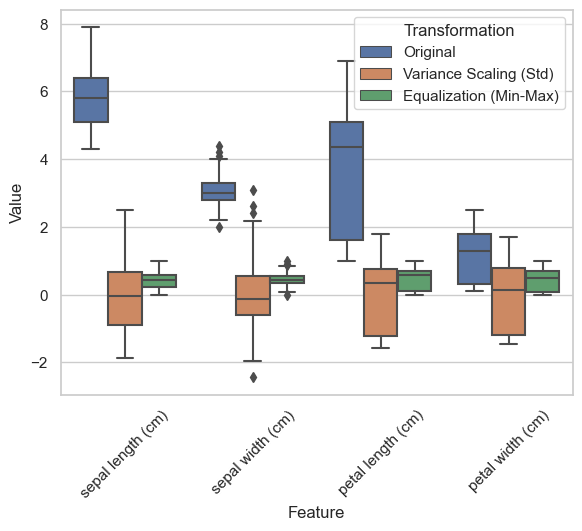

In [13]:
# Step 1 & 2: Apply the transformations
variance_scaler = StandardScaler()
equalization_scaler = MinMaxScaler()

df_variance_scaled = pd.DataFrame(variance_scaler.fit_transform(df), columns=df.columns)
df_equalized = pd.DataFrame(equalization_scaler.fit_transform(df), columns=df.columns)

# Step 3: Prepare data for plotting
df_plot = df.melt(var_name='Feature', value_name='Value')
df_plot['Transformation'] = 'Original'

df_variance_plot = df_variance_scaled.melt(var_name='Feature', value_name='Value')
df_variance_plot['Transformation'] = 'Variance Scaling (Std)'

df_equalized_plot = df_equalized.melt(var_name='Feature', value_name='Value')
df_equalized_plot['Transformation'] = 'Equalization (Min-Max)'

combined_df_plot = pd.concat([df_plot, df_variance_plot, df_equalized_plot])

# Create the visualization
plt.figure(figsize=(6.6, 5))
sns.boxplot(x='Feature', y='Value', hue='Transformation', data=combined_df_plot)
plt.xticks(rotation=45)
plt.savefig('../../LaTex/plots/e2_box.pdf', bbox_inches='tight')
plt.show()

---
## Task 3: Making Sense of Categorical Data

Not all data is numeric! To use categorical data (like "color" or "brand") in mathematical models, we first need to convert it into a binary format. We will then use the **Dice Similarity Metric** to measure the overlap between two binary vectors.

The formula is: $S_{Dice}(X, Y) = \frac{2 \times |X \cap Y|}{|X| + |Y|}$
* $|X \cap Y|$ is the number of attributes where both items are 1.
* $|X|$ and $|Y|$ are the total number of attributes where each item is 1.

### Task 3.a) Convert Categorical Data into Binary Format.

* **Step 1 & 2:** First, we define the sample categorical data about cars in a pandas DataFrame.
* **Step 3:** We then use a common technique called **One-Hot Encoding** to automatically convert these categories into a binary (0s and 1s) format. Run the code to see the result.

In [6]:
# Step 1: Define the categorical data
car_data = {
    'Color': ['Red', 'Blue', 'Yellow', 'Yellow', 'Blue'],
    'Engine': ['diesel', 'petrol', 'diesel', 'diesel', 'diesel'],
    'Brand': ['Opel', 'Ford', 'Opel', 'Ford', 'Ford']
}
car_df = pd.DataFrame(car_data, index=['Car 1', 'Car 2', 'Car 3', 'Car 4', 'Car 5'])
print("Original Categorical Data:")
display(car_df)

# Step 2 & 3: Convert to binary format using one-hot encoding
car_df_binary = pd.get_dummies(car_df)
print("\nBinary (One-Hot Encoded) Data:")
display(car_df_binary)

Original Categorical Data:


,Color,Engine,Brand
Car 1,Red,diesel,Opel
Car 2,Blue,petrol,Ford
Car 3,Yellow,diesel,Opel
Car 4,Yellow,diesel,Ford
Car 5,Blue,diesel,Ford



Binary (One-Hot Encoded) Data:


,Color_Blue,Color_Red,Color_Yellow,Engine_diesel,Engine_petrol,Brand_Ford,Brand_Opel
Car 1,0,1,0,1,0,0,1
Car 2,1,0,0,0,1,1,0
Car 3,0,0,1,1,0,0,1
Car 4,0,0,1,1,0,1,0
Car 5,1,0,0,1,0,1,0


### Task 3.b) Calculate Similarities using Dice-metrics.

* **Step 1:** We first define a Python function to calculate the Dice similarity.
* **Step 2:** The code then calculates the Dice similarity between Car 1 ("Red diesel-powered Opel") and every other car.
* **Step 3:** Review the output and think:
    * Based on the Dice metric, which car is most similar to Car 1?
    * Does this result make intuitive sense? Why or why not?
    * What are the potential limitations of this binary representation? (e.g., it loses the concept that "Red", "Blue", and "Yellow" all belong to the "Color" category).

In [7]:
# Step 1: Define the Dice similarity function
def dice_similarity(vec1, vec2):
    """Calculates the Dice similarity between two binary vectors."""
    intersection = np.sum(vec1 * vec2)
    sum_of_vectors = np.sum(vec1) + np.sum(vec2)

    if sum_of_vectors == 0:
        return 1.0 # Or 0.0, depending on definition for two empty sets

    return 2.0 * intersection / sum_of_vectors

# Step 2: Calculate similarities between Car 1 and all other cars
car1_vector = car_df_binary.loc['Car 1']

print("Dice Similarities with Car 1 (Red diesel-powered Opel):\n")
for car_name, car_vector in car_df_binary.iterrows():
    if car_name != 'Car 1':
        similarity = dice_similarity(car1_vector, car_vector)
        print(f"Similarity between Car 1 and {car_name}: {similarity:.4f}")

Dice Similarities with Car 1 (Red diesel-powered Opel):

Similarity between Car 1 and Car 2: 0.0000
Similarity between Car 1 and Car 3: 0.6667
Similarity between Car 1 and Car 4: 0.3333
Similarity between Car 1 and Car 5: 0.3333
